In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = """70 99 17 39 69 63 22 94 73 47 31 62 82 90 92 91 57 15 21 57
74 91 47 51 31 21 37 40 54 30 98 25 81 16 16 02 31 39 96 04
38 80 18 21 70 62 12 79 77 85 36 04 76 83 07 59 57 44 99 11"""

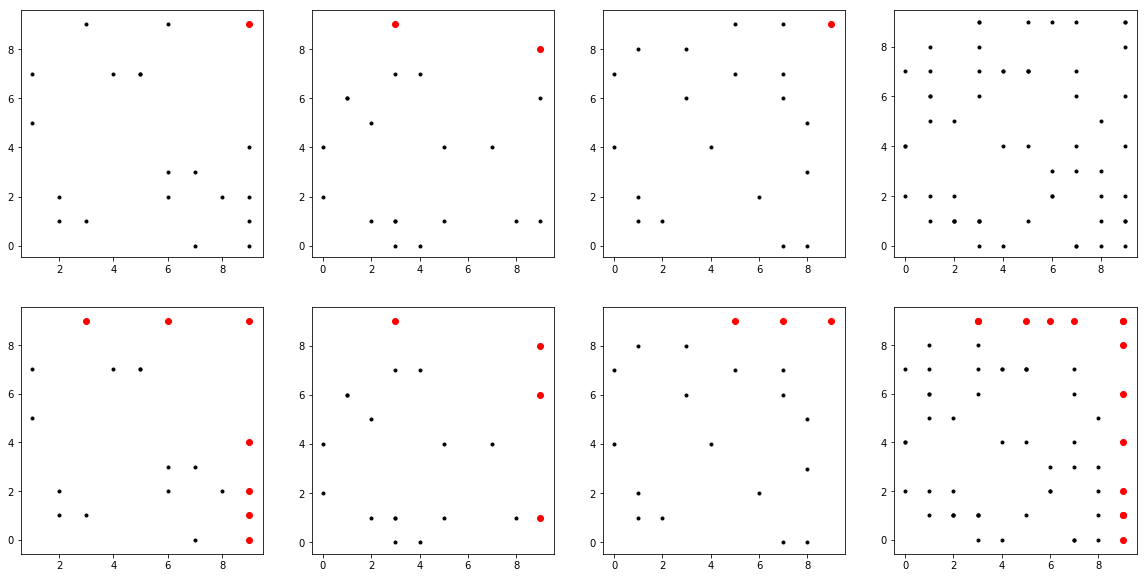

In [7]:
def slater(pts, orders=None):
    if orders is None:
        orders = [-1, -1]
    orders = np.reshape(orders, (1, 1, pts.shape[1]))
    signs = np.sign(pts.reshape(1, -1, 2) - pts.reshape(-1, 1, 2)) * orders
    signs = np.all(signs < 0, axis=2)
    idx = np.where(signs.sum(axis=1) == 0)
    return pts[idx]

def pareto(pts, orders=None):
    if orders is None:
        orders = [-1, -1]
    orders = np.reshape(orders, (1, 1, pts.shape[1]))
    signs = np.sign(pts.reshape(1, -1, 2) - pts.reshape(-1, 1, 2)) * orders
    signs = np.all(signs <= 0, axis=2)
    signs = signs * (1 - np.eye(pts.shape[0]))
    idx = np.where(signs.sum(axis=1) == 0)
    return pts[idx]

def show_slater(pts, ax, orders=None):
    frontier = slater(pts, orders=orders)
    ax.scatter(pts[:, 0], pts[:, 1], c='black', marker='.')
    ax.scatter(frontier[:, 0], frontier[:, 1], c='red', marker='o')
    
def show_pareto(pts, ax, orders=None):
    frontier = pareto(pts, orders=orders)
    ax.scatter(pts[:, 0], pts[:, 1], c='black', marker='.')
    ax.scatter(frontier[:, 0], frontier[:, 1], c='red', marker='o')

data = np.array([[[int(n) // 10, int(n) % 10] for n in e.split(' ')] for e in data.split('\n')])

P1 = data[0]
P2 = data[1]
P3 = data[2]
P4 = data.reshape(-1, 2)

orders = [-1, -1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))

for ax, pts in zip(axes[0], [P1, P2, P3, P4]):
    show_pareto(pts, ax, orders=orders)
    
for ax, pts in zip(axes[1], [P1, P2, P3, P4]):
    show_slater(pts, ax, orders=orders)